save best model
- ResNetTL-U1, ResNetTL-U0, ResNetScratch-U1, ResNetScratch-U0, DenseNetTL-U1, DenseNetTL-U0, DenseNetScratch-U1, DenseNetScratch-U0

Enlarged Cardiomediastinum: Trung thất tim mở rộng (Trung tâm ngực)

Cardiomegaly: Phì đại tim (Buồng tìm)

Lung Opacity: Đục phổi (Cả hai bên)

Lung Lesion: Mô phổi (Cả hai bên)

Edema: Phù nề

Consolidation:  Đông đặc phổi (Mô phổi)

Pneumonia: Viêm phổi (Cả hai bên)

Atelectasis: Xẹp phổi (Cả hai bên)

Pneumothorax: Tràn khí màng phổi (Giữa phổi và thành ngực)

Pleural Effusion: Tràn dịch màng phổi (Giữa phổi và thành ngực)

Pleural Other: Các bất thường màng phổi khác (Cả hai bên)

Fracture: Gãy xương (sườn, lồng ngực)

In [50]:
class_counts = [9.0, 1.0]
num_samples = sum(class_counts)
labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] #corresponding labels of samples

class_weights = [1/class_counts[i] for i in range(len(class_counts))]
weights = [class_weights[labels[i]] for i in range(int(num_samples))]

In [51]:
import numpy as np 
import pandas as pd

import utils
import torch 
import os
from torch.utils.data import  DataLoader
import torchvision.transforms as transforms
import albumentations as A
from PIL import Image
import matplotlib.pyplot as plt
from textwrap import wrap
import seaborn as sns

### Data preprocessing

In [52]:
#root_dir = '/kaggle/input/'
root_dir = ''

In [53]:
#train = pd.read_csv('/kaggle/input/chexpert/train.csv', index_col=0)
#valid = pd.read_csv('/kaggle/input/chexpert/valid.csv', index_col=0)
train = pd.read_csv('CheXpert-v1.0-small/train.csv', index_col=0)
valid = pd.read_csv('CheXpert-v1.0-small/valid.csv', index_col=0)

In [54]:
valid

,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
Path,,,,,,,,,,,,,,,,,,
CheXpert-v1.0-small/valid/patient64541/study1/view1_frontal.jpg,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CheXpert-v1.0-small/valid/patient64542/study1/view1_frontal.jpg,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CheXpert-v1.0-small/valid/patient64542/study1/view2_lateral.jpg,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CheXpert-v1.0-small/valid/patient64543/study1/view1_frontal.jpg,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CheXpert-v1.0-small/valid/patient64544/study1/view1_frontal.jpg,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CheXpert-v1.0-small/valid/patient64736/study1/view1_frontal.jpg,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CheXpert-v1.0-small/valid/patient64737/study1/view1_frontal.jpg,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CheXpert-v1.0-small/valid/patient64738/study1/view1_frontal.jpg,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
#train.index = train.index.str.replace('CheXpert-v1.0-small', 'chexpert')
#valid.index = valid.index.str.replace('CheXpert-v1.0-small', 'chexpert')

Since valid data is too small (234 images), we combine train and valid and then resplit it into train, valid, and test (80/10/10)

In [56]:
data = pd.concat([train, valid])

In [57]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 223648 entries, CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg to CheXpert-v1.0-small/valid/patient64740/study1/view1_frontal.jpg
Columns: 18 entries, Sex to Support Devices
dtypes: float64(14), int64(1), object(3)
memory usage: 32.4+ MB


In [58]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,223648.0,60.431030,17.821668,0.0,49.0,62.0,74.0,90.0
No Finding,22615.0,0.991333,0.092693,0.0,1.0,1.0,1.0,1.0
Enlarged Cardiomediastinum,45073.0,-0.033191,0.718381,-1.0,-1.0,0.0,0.0,1.0
Cardiomegaly,46437.0,0.408747,0.768105,-1.0,0.0,1.0,1.0,1.0
Lung Opacity,118012.0,0.848295,0.472826,-1.0,1.0,1.0,1.0,1.0
Lung Lesion,12178.0,0.632206,0.690605,-1.0,1.0,1.0,1.0,1.0
Edema,86190.0,0.456051,0.741190,-1.0,0.0,1.0,1.0,1.0
Consolidation,70856.0,-0.182426,0.753230,-1.0,-1.0,0.0,0.0,1.0
Pneumonia,27842.0,-0.456971,0.826168,-1.0,-1.0,-1.0,0.0,1.0
Atelectasis,68677.0,-0.004121,0.989150,-1.0,-1.0,0.0,1.0,1.0


In [59]:
print(data['Sex'].value_counts())
print(data['Age'].value_counts())
print(data['Frontal/Lateral'].value_counts())
print(data['AP/PA'].value_counts())

Sex
Male       132764
Female      90883
Unknown         1
Name: count, dtype: int64
Age
90    7590
61    5375
65    5103
66    5102
58    5080
      ... 
21    1281
23    1234
19    1169
18     768
0        3
Name: count, Length: 74, dtype: int64
Frontal/Lateral
Frontal    191229
Lateral     32419
Name: count, dtype: int64
AP/PA
AP    161759
PA     29453
LL        16
RL         1
Name: count, dtype: int64


Remove lateral view

In [60]:
data = data[data['Frontal/Lateral'] == 'Frontal']

Drop unused columns

In [61]:
data.drop(columns=['Sex', 'Age', 'Frontal/Lateral', 'AP/PA'], inplace=True)

NaN values represent no conclusion so set it to negative (0)

In [62]:
data.fillna(0, inplace=True)

Treat uncertain labels (-1) as either positive (1) or negative (0)

In [63]:
data.replace(-1, 1, inplace=True)

Set rows with no labels the label 'No Finding' to 1 (positive)

In [64]:
rows_with_no_labels = (data == 0).all(axis=1)
data.loc[rows_with_no_labels, 'No Finding'] = 1

(data == 0).all(axis=1).any()

False

Show demo images

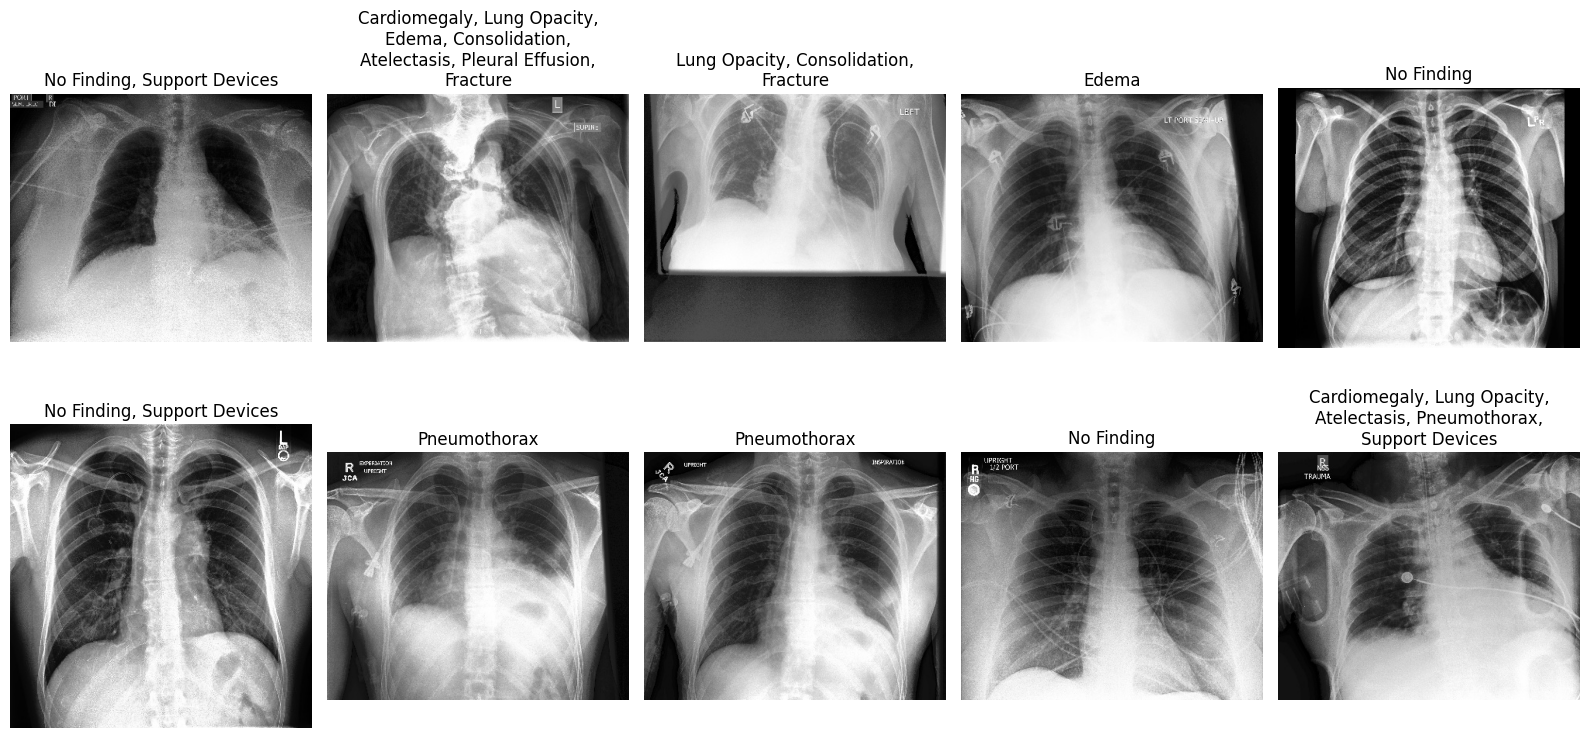

In [65]:
fig, axes = plt.subplots(2, 5, figsize=(16, 8))
axes = axes.flatten()

for i, ax in zip(range(10), axes):
    img_path = os.path.join(root_dir, data.iloc[i].name)
    img = Image.open(img_path).convert('RGB')
    
    conditions = data.columns[np.where(data.iloc[i] == 1)]

    ax.imshow(img)
    ax.set_title("\n".join(wrap(", ".join(conditions), 30)))
    ax.axis("off")

plt.tight_layout()
plt.show()


Correlation Heatmap

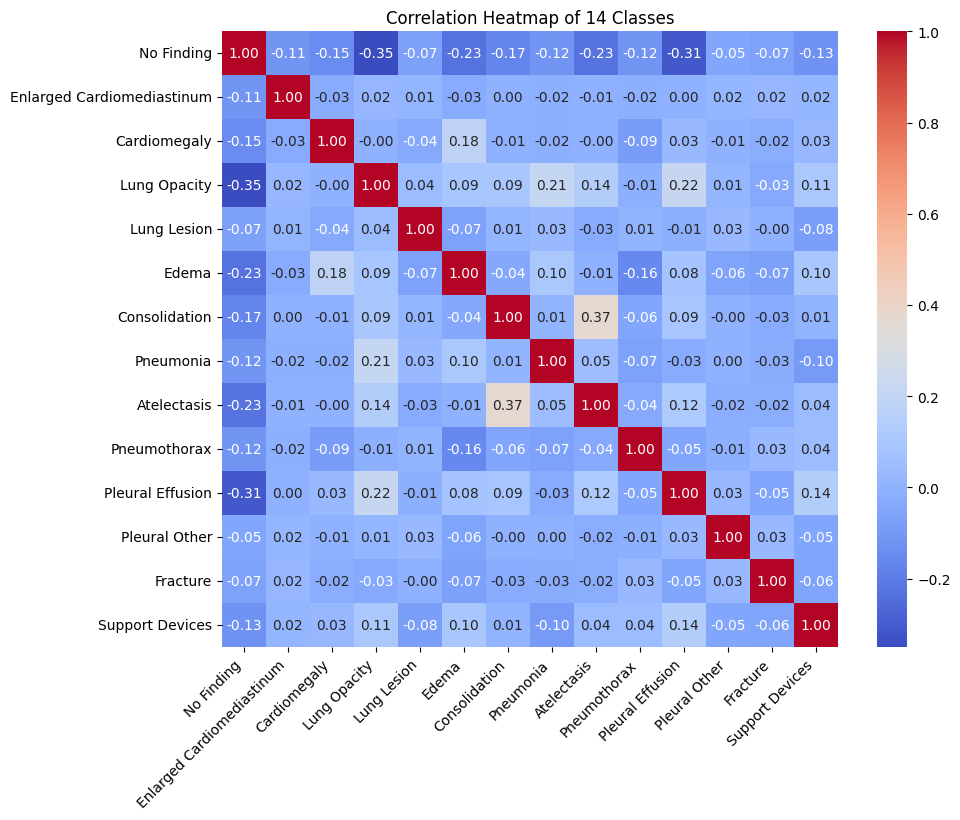

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title("Correlation Heatmap of 14 Classes")
plt.xticks(rotation=45, ha='right')
plt.show()

Class distribution

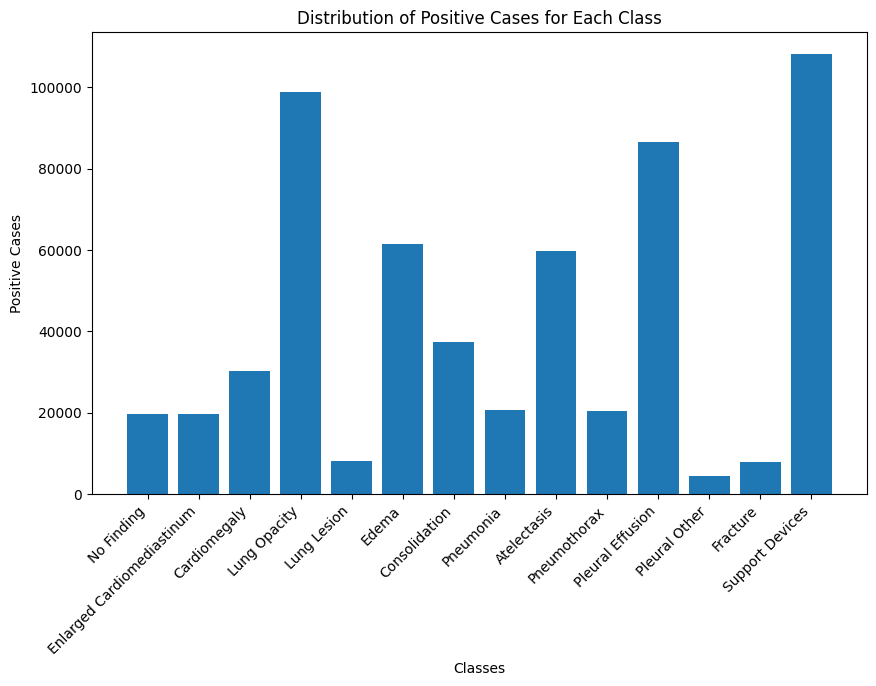

In [67]:
plt.figure(figsize=(10, 6))
plt.bar(data.sum().index, data.sum().values)
plt.title("Distribution of Positive Cases for Each Class")
plt.xlabel("Classes")
plt.ylabel("Positive Cases")
plt.xticks(rotation=45, ha='right')
plt.show()

Co-occurence of classes

In [68]:
data.T.dot(data).astype(int)

,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
No Finding,19765,0,0,0,0,0,0,0,0,0,0,0,0,7500
Enlarged Cardiomediastinum,0,19578,2466,10719,968,5506,3835,1810,5969,1811,8936,590,1048,11567
Cardiomegaly,0,2466,30158,15439,774,15619,5751,2884,9350,1241,14747,616,929,18019
Lung Opacity,0,10719,15439,98759,4976,35893,22879,16951,36793,10177,54960,2438,3433,60862
Lung Lesion,0,968,774,4976,8149,1357,1807,1292,1944,959,3404,380,333,3136
Edema,0,5506,15619,35893,1357,61535,10458,9520,18942,2268,31326,650,1271,39314
Consolidation,0,3835,5751,22879,1807,10458,37396,4215,24729,2701,20373,798,1076,21419
Pneumonia,0,1810,2884,16951,1292,9520,4215,20664,7787,958,8481,478,540,8872
Atelectasis,0,5969,9350,36793,1944,18942,24729,7787,59658,5405,32113,1097,2115,35685
Pneumothorax,0,1811,1241,10177,959,2268,2701,958,5405,20408,7717,360,1230,12715


Singular condition

In [69]:
data[data.sum(1)==1].sum(0)

No Finding                    12265.0
Enlarged Cardiomediastinum     1397.0
Cardiomegaly                   1519.0
Lung Opacity                   1909.0
Lung Lesion                     600.0
Edema                          2656.0
Consolidation                   673.0
Pneumonia                       444.0
Atelectasis                    1120.0
Pneumothorax                   2262.0
Pleural Effusion               2697.0
Pleural Other                   187.0
Fracture                       1240.0
Support Devices                1449.0
dtype: float64

In [70]:
X, y = data.index.to_numpy().reshape(-1, 1), data.values

Multi-label stratified sampling

In [71]:
from skmultilearn.model_selection import iterative_train_test_split
X_train, y_train, X_temp, y_temp = iterative_train_test_split(X, y, test_size = 0.2)
X_val, y_val, X_test, y_test = iterative_train_test_split(X_temp, y_temp, test_size=0.5)

In [72]:
pd.DataFrame(data=y_train, columns=data.columns, index=X_train.flatten()).to_csv('u1_train.csv')
pd.DataFrame(data=y_test, columns=data.columns, index=X_test.flatten()).to_csv('u1_test.csv')
pd.DataFrame(data=y_val, columns=data.columns, index=X_val.flatten()).to_csv('u1_val.csv')


In [4]:
#train = pd.read_csv('/kaggle/working/new_train.csv', index_col=0)
train = pd.read_csv('u1_train.csv', index_col=0)

Find the mean and standard deviation of training dataset for normalization (warning: the code below is ran on Kaggle)

In [4]:
dataset = utils.CheXpertDataset(
    data=train,
    root_dir=root_dir,
    mode='train',
    transforms={
        'train': transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor()]),
        'val': transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor()])}
)
loader = DataLoader(dataset, shuffle=False, batch_size=16, pin_memory=True, num_workers=4)

In [75]:
from tqdm import tqdm

pixel_sum = torch.tensor(0.0, device='cuda')
pixel_squared_sum = torch.tensor(0.0, device='cuda')
n_pixels = 0

for batch in tqdm(loader, desc="Processing batches"):
    image_batch = batch[0].cuda(non_blocking=True)
    batch_size, channels, height, width = image_batch.size()

    image_batch = image_batch.mean(dim=1, keepdim=True)
    
    n_pixels += batch_size * height * width

    pixel_sum += image_batch.sum()
    pixel_squared_sum += (image_batch ** 2).sum()


mean = pixel_sum / n_pixels
variance = (pixel_squared_sum / n_pixels) - (mean ** 2)
std = torch.sqrt(variance)

mean = mean.item()
std = std.item()
print(mean, std)

Processing batches: 100%|██████████| 9562/9562 [06:22<00:00, 24.99it/s]

0.5063853859901428 0.2867166996002197


Plot augmentation methods

In [66]:
augs = {'default': None, 'rotate':A.Affine(rotate=(-20, 20), p=1), 'scale': A.Affine(scale=(0.9, 1.1), p=1), 'shear': A.Affine(shear=(-5, 5), p=1), 'translation': A.Affine(translate_percent=(-0.05, 0.05), p=1)}

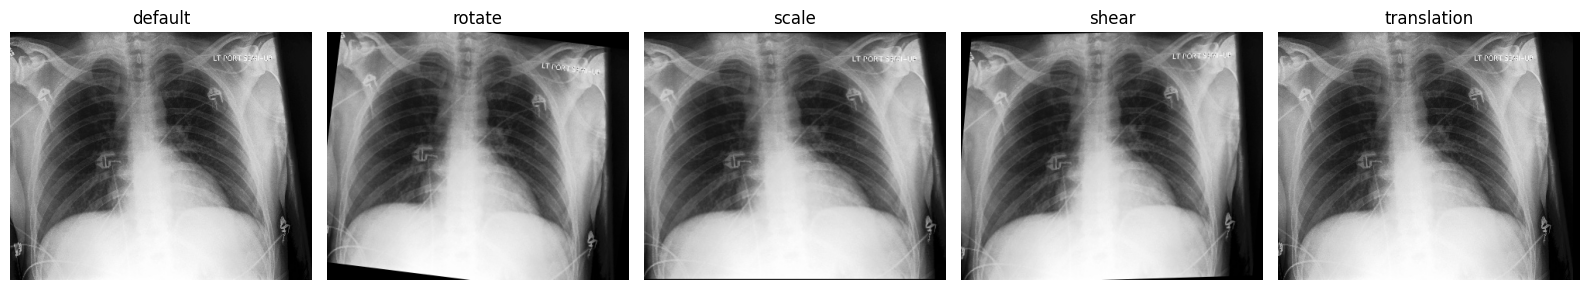

In [68]:
fig, axes = plt.subplots(1, 5, figsize=(16, 8))
axes = axes.flatten()
img_path = os.path.join(root_dir, train.iloc[1].name)
img = Image.open(img_path).convert('RGB')

for aug, ax in zip(augs.keys(), axes):
    if aug == 'default':
        ax.imshow(img)
    else:
        aug_img = augs[aug](image=np.array(img))
        ax.imshow(aug_img['image'])
    ax.set_title(f"{aug}")
    ax.axis("off")

plt.tight_layout()
plt.show()